## Descripción del proyecto
Se te ha ido muy bien en el curso Practicum y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Una aplicación que ayuda a los usuarios a encontrar y comprar billetes para eventos como proyecciones de películas, exhibiciones, conciertos, etcétera. Tu primera tarea es ayudar a optimizar los gastos de marketing.

## Objetivo:  
Ayudar a optimizar los gastos de marketing.

## Etapas 
 
El proyecto consistirá en cinco etapas:
 1. Descarga los datos y prepáralos para el análisis
 2. Haz informes y calcula métricas
 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

In [2]:
try:
    costs = pd.read_csv('/content/costs_us.csv',dtype={'source_id': 'category'}, parse_dates=['dt'])
    orders = pd.read_csv('/content/orders_log_us.csv', parse_dates=['Buy Ts'])
    visits = pd.read_csv('/content/visits_log_us.csv',dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
    
except:
    costs = pd.read_csv('/datasets/costs_us.csv',dtype={'source_id': 'category'}, parse_dates=['dt'])
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
    visits = pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
    

## Etapa 1. Descarga los datos y prepáralos para el análisis

## Información tabla `costs`

In [3]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [4]:
costs.columns = ['source_id','date','costs']
costs.columns

Index(['source_id', 'date', 'costs'], dtype='object')

In [5]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 43.0 KB


In [6]:
costs.describe()

,costs
count,2542.000000
mean,129.477427
std,156.296628
min,0.540000
25%,21.945000
50%,77.295000
75%,170.065000
max,1788.280000


In [7]:
costs['date'].describe(datetime_is_numeric =True)

count                             2542
mean     2017-11-29 09:04:57.403619072
min                2017-06-01 00:00:00
25%                2017-08-30 00:00:00
50%                2017-11-29 00:00:00
75%                2018-02-28 00:00:00
max                2018-05-31 00:00:00
Name: date, dtype: object

In [8]:
costs.duplicated().sum()

0

## Información tabla `orders`

In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.columns = ['buy_date','revenue','uid']
orders.columns

Index(['buy_date', 'revenue', 'uid'], dtype='object')

In [11]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   buy_date  50415 non-null  datetime64[ns]
 1   revenue   50415 non-null  float64       
 2   uid       50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [13]:
orders.buy_date.describe(datetime_is_numeric = True)

count                            50415
mean     2017-12-20 05:14:24.846176768
min                2017-06-01 00:10:00
25%                2017-10-13 17:28:00
50%                2017-12-21 14:12:00
75%                2018-03-02 16:10:00
max                2018-06-01 00:02:00
Name: buy_date, dtype: object

In [14]:
orders.duplicated().sum()

0

## Información tabla `visits`

In [15]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [16]:
visits.columns = ['device','end_date','source_id','start_date','uid']

In [17]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device      359400 non-null  category      
 1   end_date    359400 non-null  datetime64[ns]
 2   source_id   359400 non-null  int64         
 3   start_date  359400 non-null  datetime64[ns]
 4   uid         359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [18]:
visits.device.value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [19]:
visits.source_id.value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [20]:
visits.describe()

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [21]:
visits.duplicated().sum()

0

## Conclusión
Tras el primer análisis no se observan datos faltantes ni duplicados en ninguna de las 3 bases de datos, se decide renombrar columnas para facilitar el análisis posterior. Se cambian los formatos de fechas de las 3 bases de datos.

## Etapa 2. Haz informes y calcula métricas

## Producto

In [22]:
visits.head()

,device,end_date,source_id,start_date,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [23]:
visits_ = visits.copy()

In [24]:
# primero crearemos columnas separadas para los valores de año, mes y semana.
visits_['session_year']  = visits_['start_date'].dt.year
visits_['session_month'] = visits_['start_date'].dt.month
visits_['session_week']  = visits_['start_date'].dt.week
visits_['session_date'] = visits_['start_date'].dt.date
print(visits_.head())

<ipython-input-24-f14b3c1a0b8a>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits_['session_week']  = visits_['start_date'].dt.week


    device            end_date  source_id          start_date  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


¿Cuántas personas lo usan cada día, semana y mes?

In [25]:
# Agruparemos los datos por fecha/semana de la sesión y buscaremos las medias:
dau_total = visits_.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits_.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits_.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('el número de usuarios activos diarios:',(int(dau_total)))
print('el número de usuarios activos semanalmente:',(int(wau_total)))
print('el número de usuarios activos mensualmente:',(int(mau_total)))

el número de usuarios activos diarios: 907
el número de usuarios activos semanalmente: 5716
el número de usuarios activos mensualmente: 23228


In [26]:
dau = visits_.groupby('session_date').agg({'uid': 'nunique'})
wau = visits_.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
mau = visits_.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()

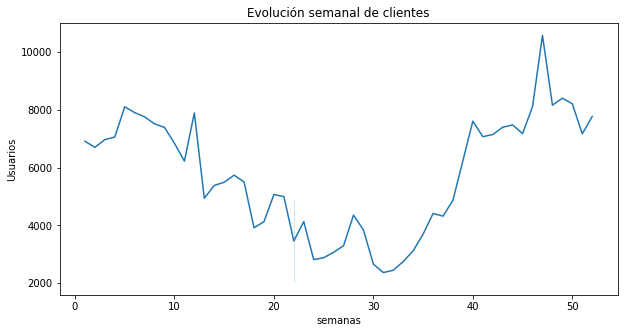

In [27]:
plt.figure(figsize=(10, 5))
plt.title('Evolución semanal de clientes')
plt.xlabel('semanas')
plt.ylabel('Usuarios')
sns.lineplot(data=wau,x='session_week',y='uid');

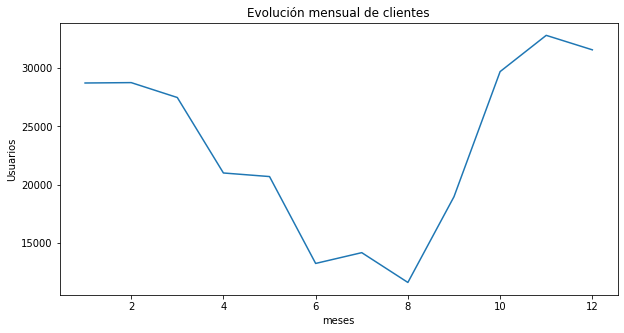

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Evolución mensual de clientes')
plt.xlabel('meses')
plt.ylabel('Usuarios')
sns.lineplot(data=mau,x='session_month',y='uid');

¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [29]:
visits.head()

,device,end_date,source_id,start_date,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [30]:
# Agrupar sesiones por dia
sessions_per_user = visits_.groupby(['session_week', 'session_date']).agg({'uid': ['count', 'nunique']})  
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])
sessions_per_user

n_sessions  n_users  sessions_per_user
session_week session_date                                        
1            2018-01-01          1065      992           1.073589
             2018-01-02          1355     1265           1.071146
             2018-01-03          1317     1219           1.080394
             2018-01-04          1370     1260           1.087302
             2018-01-05          1092     1006           1.085487
...                               ...      ...                ...
52           2017-12-27          1444     1334           1.082459
             2017-12-28          1496     1377           1.086420
             2017-12-29          1315     1192           1.103188
             2017-12-30          1192     1106           1.077758
             2017-12-31           784      732           1.071038

[364 rows x 3 columns]

In [31]:
print('Sesiones promedio por dia:', sessions_per_user['n_sessions'].mean())

Sesiones promedio por dia: 987.3626373626373


In [32]:
print('Sesiones por usuario promedio al dia:', sessions_per_user['sessions_per_user'].mean())

Sesiones por usuario promedio al dia: 1.0821696440039719


¿Cuál es la duración de cada sesión?

In [33]:
visits_['session_duration_sec'] = (visits_['end_date'] - visits_['start_date']).dt.seconds
print(visits_['session_duration_sec'].mean()) 

643.506488592098


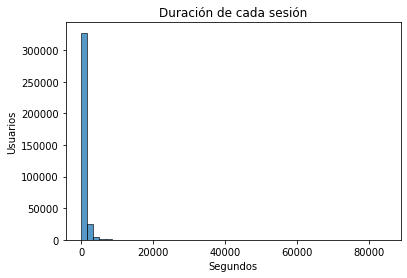

In [34]:
plt.title('Duración de cada sesión')
plt.xlabel('Segundos')
plt.ylabel('Usuarios')
sns.histplot(visits_['session_duration_sec'],bins=50);

In [35]:
print(visits_['session_duration_sec'].mode()) 
print('-----------------------------------')
print(visits_['session_duration_sec'].mean())
print('-----------------------------------')
print(visits_['session_duration_sec'].median())

0    60
dtype: int64
-----------------------------------
643.506488592098
-----------------------------------
300.0


Dado que la columna `session_duration_sec` muestra valores atípicos. lo mas recomendable es utilizar la mediana como medida de tendencia central. 

## ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [36]:
# sticky factor (factor de adherencia)
sticky_wau = dau_total / wau_total * 100
print('El factor de adherencia semanal es de un', sticky_wau)
print('-----------------------------------------')
sticky_mau = dau_total / mau_total * 100
print('El factor de adherencia mensual a mes es de un', sticky_mau)

El factor de adherencia semanal es de un uid    15.884409
dtype: float64
-----------------------------------------
El factor de adherencia mensual a mes es de un uid    3.90897
dtype: float64


In [37]:
visits_.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


In [38]:
first_visits_date = visits_.groupby('uid')['start_date'].min()
first_visits_date.name = 'first_visits_date'
visits_ = visits_.join(first_visits_date, on='uid')
visits_['first_visits_month'] = visits_['first_visits_date'].astype('datetime64[M]')
visits_['visits_month'] = visits_['start_date'].astype('datetime64[M]')
visits_.head()

,device,end_date,source_id,start_date,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visits_date,first_visits_month,visits_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


In [39]:
reten_table = visits_.pivot_table(
    index='first_visits_month',
    columns='visits_month',
    values='uid',
    aggfunc='nunique',
    fill_value='-'
) 
reten_table

visits_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visits_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,-,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,-,-,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,-,-,-,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,-,-,-,-,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,-,-,-,-,-,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,-,-,-,-,-,-,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,-,-,-,-,-,-,-,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,-,-,-,-,-,-,-,-,22197.0,1267.0,565.0,446.0


Con respecto a la retención de clientes para los meses posteriores a la primera visita, podemos concluir que solo los cohortes de junio, julio y agosto tuvieron variaciones entre positivas y negativas. todos los demás cohortes tienen tendencia a la baja.

## Conclusión
Tras analizar la información correspondiente al producto. Evidenciamos los usuarios activos por día(907), semana(5716) ,mes(23228). También descubrimos que existe un promedio de sesión por usuario de 1.08 y que la duración promedio de cada sesión es de 643 segundos. Finalmente la frecuencia con la cual regresan los usuarios equivale a un  15% semanal y un 3% mensual.

## Ventas

In [40]:
orders.head()

,buy_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [41]:
print('Cantidad de usuarios que compraron', orders.uid.nunique())

Cantidad de usuarios que compraron 36523


In [42]:
first_purchase_date = orders.groupby('uid')['buy_date'].min()
first_purchase_date.name = 'first_purchase_date'
orders = orders.join(first_purchase_date, on='uid')
orders['first_purchase_month'] = orders['first_purchase_date'].astype('datetime64[M]')
orders['purchase_month'] = orders['buy_date'].astype('datetime64[M]')
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


## ¿Cuándo la gente empieza a comprar?

In [43]:
ventas = visits.merge(orders, on='uid', how='inner')
ventas.head()

,device,end_date,source_id,start_date,uid,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01


In [44]:
first_register = ventas.groupby('uid')['start_date'].min()
first_register.name = 'first register'
ventas = ventas.join(first_register, on='uid')
ventas.head()

,device,end_date,source_id,start_date,uid,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month,first register
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017-09-03 21:35:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00


In [45]:
ventas['days_lapsed'] = ventas['first_purchase_date'] - ventas['first register']
ventas.head()

,device,end_date,source_id,start_date,uid,buy_date,revenue,first_purchase_date,first_purchase_month,purchase_month,first register,days_lapsed
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00,0 days 00:20:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00,2018-03-01,2018-03-01,2018-03-09 20:05:00,0 days 00:20:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00,2017-09-01,2017-09-01,2017-09-03 21:35:00,0 days 15:11:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00,0 days 15:11:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00,2017-09-01,2017-10-01,2017-09-03 21:35:00,0 days 15:11:00


In [46]:
ventas['days_lapsed'] = ventas['days_lapsed'].dt.days

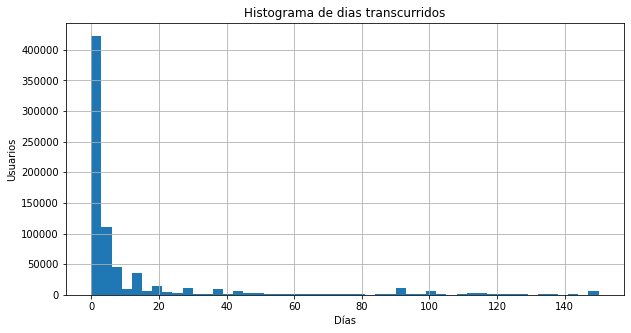

In [47]:
plt.figure(figsize=(10, 5))
ventas['days_lapsed'].hist(bins=50, range=[0, 150])

plt.title('Histograma de dias transcurridos')
plt.xlabel('Días')
plt.ylabel('Usuarios');

In [48]:
print(ventas['days_lapsed'].mean())
print('Los usuarios tardan en promedio 17 dias en hacer su primera compra')

17.291336257083486
Los usuarios tardan en promedio 17 dias en hacer su primera compra


## Conclusión
Inicialmente calculamos la cantidad de compradores la que asciende a 36.523 entre las fechas 2017-06-01 y 2018-06-01.Nos percatamos que los clientes tardan 17 días en promedio para efectuar una compra, esto podría indicar que el contenido de los eventos que se muestran no son sumamente llamativos para los usuarios.

In [49]:
ventas_pivot = ventas.pivot_table(index='source_id',columns='purchase_month',values='revenue',aggfunc='mean',fill_value=0)
ventas_pivot

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
source_id,,,,,,,,,,,,,
1,5.502451,9.527559,7.161385,12.989867,8.581261,9.092026,8.827170,6.745197,6.432797,11.599352,15.834166,7.162529,0.00
2,6.725303,6.813063,5.334911,12.650045,12.944226,7.395941,21.218282,9.148580,8.683977,11.598646,10.622225,6.834659,0.00
3,4.437207,6.869988,4.647399,7.247511,6.005468,5.500729,9.489813,4.840818,6.190074,6.024283,6.189934,5.565856,0.00
4,6.002714,7.856760,6.671353,12.243548,9.024949,6.186290,8.842557,6.284756,7.772168,8.129466,8.477336,5.894003,3.42
5,5.174092,5.207625,4.991391,8.467668,7.194639,6.060473,16.592249,6.214697,6.841029,7.411243,5.754198,5.012987,0.00
7,0.000000,0.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,3.673092,4.378744,3.806566,4.556382,4.193699,3.669162,3.855890,2.377684,3.493637,2.853473,6.155130,4.854952,0.00
10,4.604406,4.390957,5.736606,3.439124,3.278795,3.032617,2.424812,2.860952,3.323906,4.187366,3.512615,4.435353,0.00


In [50]:
ventas_pivot.columns = [str(item)[:10] for item in ventas_pivot.columns]

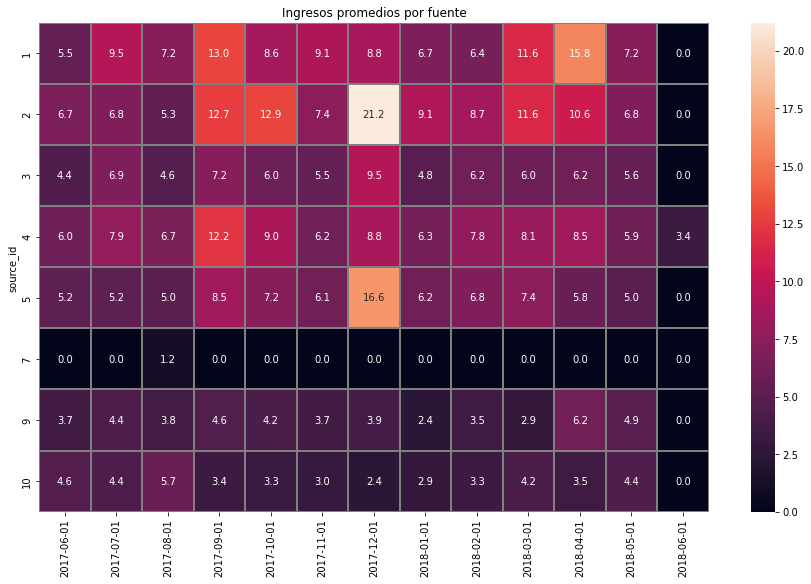

In [51]:
plt.figure(figsize=(15, 9))
plt.title('Ingresos promedios por fuente')
sns.heatmap(
    ventas_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

## conclusión
Creamos un gráfico para identificar cuales son las fuentes que generan mas ingresos para la empresa, Siendo las fuentes 1,2,4 y 5 las que generan trafico de calidad hacia la app.

## ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [52]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [53]:
cohort_grouped = orders.groupby('first_purchase_month').agg({'buy_date': 'nunique','uid':'nunique'})
cohort_grouped.columns = ['orders','users']
cohort_grouped

,orders,users
first_purchase_month,,
2017-06-01,4322,2023
2017-07-01,2797,1923
2017-08-01,2133,1370
2017-09-01,3730,2581
2017-10-01,5573,4340
2017-11-01,5361,4081
2017-12-01,5483,4383
2018-01-01,4069,3373
2018-02-01,4143,3651


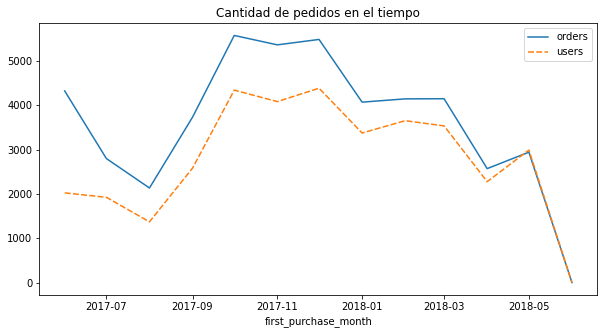

In [54]:
plt.figure(figsize=(10, 5))
plt.title('Cantidad de pedidos en el tiempo')
sns.lineplot(data=cohort_grouped);

In [55]:
print('Cantidad de pedidos promedio al año', cohort_grouped['orders'].mean())

Cantidad de pedidos promedio al año 3636.076923076923


## Conclusión
Tras analizar los datos podemos concluir que durante el periodo examinado existe una leve regularidad de compras sim embargo destaca el periodo de octubre a diciembre por su cantidad de pedidos en la app. Esto tiene sentido si pensamos que en los últimos meses del año aumenta la necesidad de participar de eventos masivos ya sea por clima o por festividades que se aproximan.

## ¿Cuál es el tamaño promedio de compra?

In [56]:
orders_grouped_by_cohorts = orders.groupby(['first_purchase_month', 'purchase_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
orders_grouped_by_cohorts.head()

revenue   uid
first_purchase_month purchase_month               
2017-06-01           2017-06-01      9557.49  2023
                     2017-07-01       981.82    61
                     2017-08-01       885.34    50
                     2017-09-01      1931.30    54
                     2017-10-01      2068.58    88

In [57]:
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid'])
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_purchase_month purchase_month                                  
2017-06-01           2017-06-01       9557.49  2023          4.724414
                     2017-07-01        981.82    61         16.095410
                     2017-08-01        885.34    50         17.706800
                     2017-09-01       1931.30    54         35.764815
                     2017-10-01       2068.58    88         23.506591
...                                       ...   ...               ...
2018-03-01           2018-05-01       1114.87    58         19.221897
2018-04-01           2018-04-01      10600.69  2276          4.657597
                     2018-05-01       1209.92    69         17.535072
2018-05-01           2018-05-01      13925.76  2988          4.660562
2018-06-01           2018-06-01          3.42     1          3.420000

[79 rows x 3 columns]

In [58]:
orders_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='purchase_month',
    values='revenue_per_user',
    aggfunc='mean',
) 
orders_pivot

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139062,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [59]:
orders_pivot.columns = [str(item)[:10] for item in orders_pivot.columns]

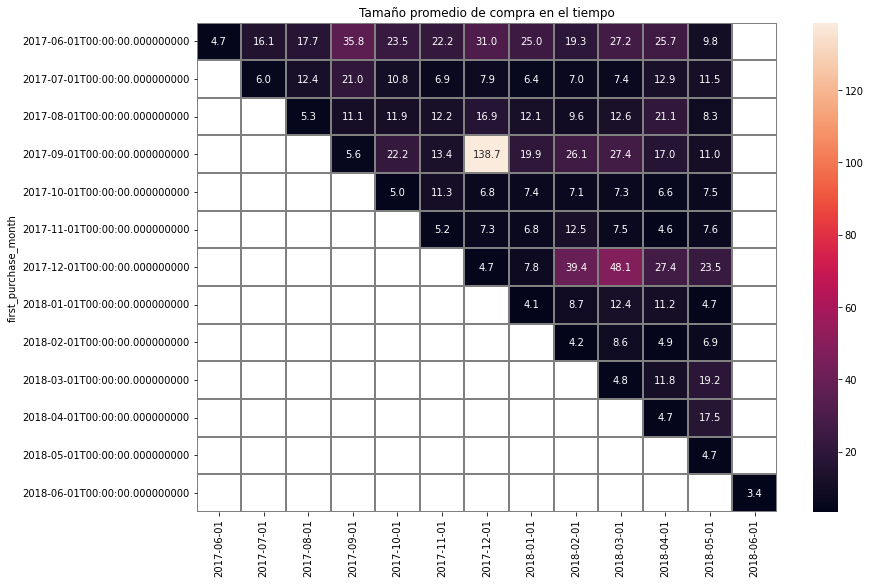

In [60]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra en el tiempo')
sns.heatmap(
    orders_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

In [61]:
print('El tamaño promedio de compra es ', orders_grouped_by_cohorts['revenue_per_user'].median())

El tamaño promedio de compra es  11.044651162790698


In [62]:
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_purchase_month purchase_month                                  
2017-06-01           2017-06-01       9557.49  2023          4.724414
                     2017-07-01        981.82    61         16.095410
                     2017-08-01        885.34    50         17.706800
                     2017-09-01       1931.30    54         35.764815
                     2017-10-01       2068.58    88         23.506591
...                                       ...   ...               ...
2018-03-01           2018-05-01       1114.87    58         19.221897
2018-04-01           2018-04-01      10600.69  2276          4.657597
                     2018-05-01       1209.92    69         17.535072
2018-05-01           2018-05-01      13925.76  2988          4.660562
2018-06-01           2018-06-01          3.42     1          3.420000

[79 rows x 3 columns]

In [63]:
orders_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='purchase_month',
    values='uid',
    aggfunc='sum',
    fill_value=''
) 
orders_pivot

purchase_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_purchase_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,
2017-07-01,,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,
2017-08-01,,,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,
2017-09-01,,,,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,
2017-10-01,,,,,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,
2017-11-01,,,,,,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,
2017-12-01,,,,,,,4383.0,146.0,103.0,97.0,50.0,63.0,
2018-01-01,,,,,,,,3373.0,114.0,83.0,43.0,45.0,
2018-02-01,,,,,,,,,3651.0,118.0,58.0,39.0,


## Conclusión
Tras analizar el grafico de calor podemos observar que todos los cohortes presentan crecimiento en ventas a contar del primer mes, el único que muestra una baja en ventas en comparación a su mes de primera compra es el cohorte de 2017-11-01 en el mes de abril. Por otra parte el cohorte de septiembre del 2019 muestra en el mes de diciembre un comportamiento atípico en comparación al general de compra.

## ¿Cuánto dinero traen? (LTV)

In [64]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [65]:
first_orders = orders.groupby('uid').agg({'purchase_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [66]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [67]:
orders_ = pd.merge(orders,first_orders, on='uid')
orders_.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


In [68]:
cohorts = orders_.groupby(['first_order_month','purchase_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,purchase_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [69]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,purchase_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [70]:
margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['purchase_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,purchase_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [71]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.362207,0.242664,0.218819,0.477336,0.511265,0.367751,0.47522,0.290796,0.276607,0.302894,0.28563,0.128428
2017-07-01,3.005109,0.167605,0.311765,0.179488,0.088396,0.078024,0.060104,0.07091,0.080616,0.073573,0.077837,
2017-08-01,2.638259,0.235996,0.229241,0.195639,0.247026,0.14177,0.105332,0.202504,0.146106,0.093989,,
2017-09-01,2.822265,0.558793,0.260465,1.987896,0.200279,0.323534,0.350804,0.121575,0.092003,,,
2017-10-01,2.501866,0.267881,0.095697,0.078573,0.07578,0.060181,0.042408,0.057735,,,,
2017-11-01,2.577341,0.199617,0.099778,0.162476,0.074006,0.026939,0.057464,,,,,
2017-12-01,2.369095,0.130187,0.462548,0.532637,0.156465,0.169023,,,,,,
2018-01-01,2.067818,0.147379,0.152141,0.071389,0.031349,,,,,,,
2018-02-01,2.078494,0.139137,0.039258,0.037072,,,,,,,,


In [72]:
ltv_20170601 = output.loc['2017-06-01'].sum()
ltv_20170601

5.939616905585764

## Conclusión
Como muestra la tabla dinámica el primer mes de cada cohorte fue el que registro la mayor venta promedio en comparación a los meses siguientes. a modo de ejemplo se tomo el  primer cohorte y nos arroja un ltv de 5.93

In [73]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [74]:
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [75]:
costs.source_id.value_counts()

5     364
1     363
10    363
2     363
3     363
4     363
9     363
Name: source_id, dtype: int64

In [76]:
costs['month'] = costs['date'].astype('datetime64[M]')

## ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [77]:
total_cost_time = costs.pivot_table(index='source_id',columns='month',values='costs',aggfunc='sum')
total_cost_time

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17


In [78]:
total_cost_time.columns = [str(item)[:10] for item in total_cost_time.columns]

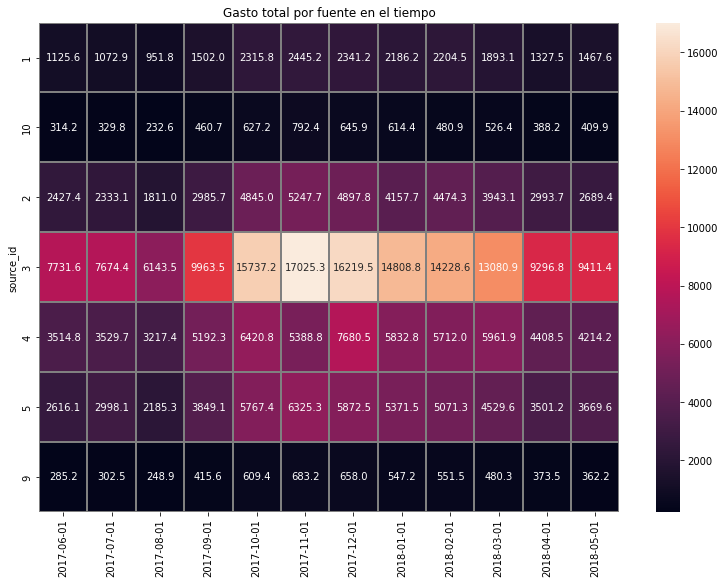

In [79]:
plt.figure(figsize=(13, 9))
plt.title('Gasto total por fuente en el tiempo')
sns.heatmap(
    total_cost_time,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

## Conclusión
La información mas importante que entrega el grafico de gasto total por fuente en el tiempo, Es que la fuente numero 3 genera un costo muy alto en comparación a las otras fuentes no cabe duda que seria bueno entender a que tipo de fuente se refiere.

## ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [80]:
costs.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [81]:
orders.head()

,buy_date,revenue,uid,first_purchase_date,first_purchase_month,purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [82]:
report.head()

,first_order_month,n_buyers,purchase_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265


In [83]:
report_ = pd.merge(report, costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,purchase_month,revenue,gp,age,ltv,source_id,date,costs,month,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-01,75.20,2017-06-01,0.037173
1,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-02,62.25,2017-06-01,0.030771
2,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-03,36.53,2017-06-01,0.018057
3,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-04,55.00,2017-06-01,0.027187
4,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1,2017-06-05,57.08,2017-06-01,0.028216


In [84]:
cac_costs = report_.pivot_table(index='source_id',columns='month',values='cac',aggfunc='sum')
cac_costs

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,6.676876,6.137119,6.947518,5.237540,4.268664,4.194099,3.204928,3.240706,2.415207,1.607492,1.166511,0.491168
10,1.863885,1.886646,1.697591,1.606366,1.156203,1.359108,0.884134,0.910688,0.526847,0.446994,0.341169,0.137169
2,14.398695,13.345923,13.219343,10.411058,8.930876,9.001166,6.704723,6.163267,4.902043,3.348265,2.630668,0.900080
3,45.862481,43.899152,44.843358,34.743103,29.008737,29.202985,22.203313,21.951942,15.588672,11.107430,8.169429,3.149739
4,20.849036,20.190863,23.484380,18.105517,11.835650,9.243259,10.513990,8.646294,6.257968,5.062443,3.873893,1.410378
5,15.518260,17.150047,15.950949,13.422030,10.631152,10.849640,8.039042,7.962526,5.556078,3.846267,3.076582,1.228099
9,1.691864,1.730598,1.817007,1.449275,1.123336,1.171835,0.900726,0.811088,0.604218,0.407832,0.328199,0.121208


In [85]:
cac_costs.columns = [str(item)[:10] for item in cac_costs.columns]

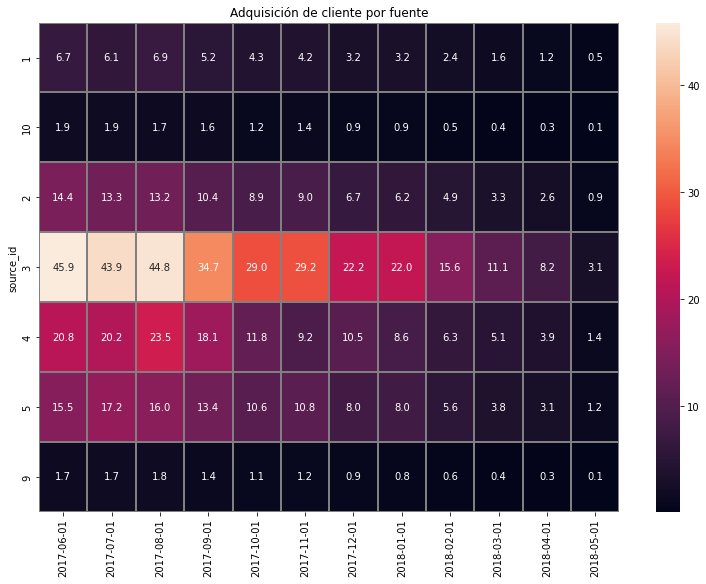

In [86]:
plt.figure(figsize=(13, 9))
plt.title('Adquisición de cliente por fuente')
sns.heatmap(
    cac_costs,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
);

## Conclusión
Obviamente los clientes que llegan a la app por la fuente 3 son los mas costosos, ya que es la fuente que genera el mayor gasto de dentro de la empresa.
Registrando un pico de costos el mes de noviembre de 2017.

## ¿Cuán rentables eran las inversiones? (ROI)

In [87]:
# Beneficio neto - inversion / inversion
roi = (-77074 - 329132) / 329132
print(f'El ROI actual de la inversión es {roi} %')

El ROI actual de la inversión es -1.2341735230849629 %


## Conclusión 
Calculando distintas métricas de la empresa no es de extrañar que su ROI sea negativo ya que la empresa gasta mas de lo que recauda por ende aparte de la inversión inicial que equivale al 100 % adeuda un 23.4 % mas.

## Consejo para los expertos de marketing cuánto dinero invertir y dónde 

In [88]:
revenues = orders.groupby('purchase_month')['revenue'].sum()
costes = costs.groupby('month')['costs'].sum()

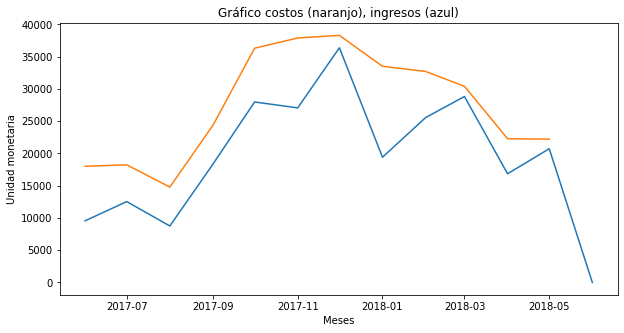

In [89]:
plt.figure(figsize=(10, 5))
plt.title('Gráfico costos (naranjo), ingresos (azul)')
sns.lineplot(data=revenues)
sns.lineplot(data=costes),
plt.ylabel('Unidad monetaria')
plt.xlabel('Meses');

In [90]:
total_ingreso = orders['revenue'].sum()
total_ingreso

252057.19999999998

In [91]:
total_costos = costs['costs'].sum()
total_costos

329131.62

In [92]:
# Beneficio bruto = facturación - costo primo
bb = total_ingreso - total_costos
bb

-77074.42000000001

In [93]:
n_users = 36523
revenue_per_user = 6.98

var_costs = 329131

fixed_costs = 0

revenue = 254931
total_costs = 329131

print('Ingresos:', revenue)
print('Costos:', total_costs)
print('Beneficios:', revenue - total_costs)

Ingresos: 254931
Costos: 329131
Beneficios: -74200


Realizamos un modelo basándonos en la economía global de la empresa y el resultado entrego que la empresa gasta mas de lo que recauda.

In [94]:
n_users = 36523
revenue_per_user = 6.98

var_costs = pd.Series({'marketing': 329131, 'servers': 0})

fixed_costs = pd.Series({'salaries': 0, 'rent': 0})

revenue = n_users * revenue_per_user
total_costs = var_costs.sum() + fixed_costs.sum()

one_unit_var_costs = var_costs / n_users

print('Ingresos:', revenue_per_user)
print('Costos:', one_unit_var_costs.sum() )
print('Beneficios:',revenue_per_user - one_unit_var_costs.sum() )

Ingresos: 6.98
Costos: 9.011609123018372
Beneficios: -2.031609123018372


Al realizar el segundo modelo basándonos en la economía unitaria de la empresa el resultado fue negativo por ende el negocio no es escalable, a mayor inversión mayor costo. El negocio no tiene una economía sana.

In [95]:
def unit_economics(marketing):  
    n_users = marketing / one_unit_var_costs['marketing']
    revenue = revenue_per_user * n_users
    var_costs = one_unit_var_costs * n_users
    return revenue - sum(var_costs) - sum(fixed_costs)

for m in range(329131, 1500000, 100000):
    print('Beneficio/pérdida: {} con un presupuesto de {}'.format(unit_economics(m), m))

Beneficio/pérdida: -74200.45999999999 con un presupuesto de 329131
Beneficio/pérdida: -96744.81467944378 con un presupuesto de 429131
Beneficio/pérdida: -119289.16935888748 con un presupuesto de 529131
Beneficio/pérdida: -141833.52403833123 con un presupuesto de 629131
Beneficio/pérdida: -164377.878717775 con un presupuesto de 729131
Beneficio/pérdida: -186922.23339721863 con un presupuesto de 829131
Beneficio/pérdida: -209466.5880766625 con un presupuesto de 929131
Beneficio/pérdida: -232010.94275610626 con un presupuesto de 1029131
Beneficio/pérdida: -254555.2974355499 con un presupuesto de 1129131
Beneficio/pérdida: -277099.6521149938 con un presupuesto de 1229131
Beneficio/pérdida: -299644.0067944374 con un presupuesto de 1329131
Beneficio/pérdida: -322188.3614738812 con un presupuesto de 1429131


Finalmente realizamos una proyección de cuanto dinero invertir para revertir los malos números de la empresa. Lamentablemente al no ser escalable y no contar con una buena salud financiera, la empresa a mayor inversión mayor costo.

## Conclusión final
Tras analizar la información presentada podemos concluir que la empresa durante el periodo de análisis no mostró numero azules, Siempre ha gastado mas de lo que recauda. al analizar la economía global de la empresa los números no fueron alentadores ya que la empresa tiene un beneficio de -74.000. revisamos la economía unitaria para ver si existe algún numero positivo, sin embargo la economía unitaria cayó en la misma tendencia, ingresos de 6.98 y costos de 9.11 lo que nos da un beneficio unitario de -2.03. creamos un modelo para proyectar alguna inversión que puede revertir la mala situación financiera de la empresa y lamentablemente a mayor inversión de marketing mas suben los costos. Lo positivo del análisis es que encontramos la principal razón de la mala gestión de marketing dado que se inyecta gran cantidad del presupuesto en la fuente numero 3 y esta no genera mayores ingresos. las fuentes con mayores ingresos son 1,2,4 y 5. Creemos que al cambiar la inversión de marketing a las fuentes correspondientes si se pueden cambiar los resultados y que finalmente la empresa tenga números azules.